In [ ]:
import pandas as pd
import numpy as np
%matplotlib inline
import os
import matplotlib.pyplot as plt
import calplot
from pandas.api.types import CategoricalDtype
import seaborn as sns
import plotly.express as px
import folium
import chardet
import geopandas as gpd
from geopandas.tools import geocode
import warnings
from geopy.geocoders import Nominatim

In [ ]:
# Opening file

names = ["Dis No"]

#Natural_Disasters = pd.read_csv('NaturalDisastersv3.xlsx',names=names, lineterminator='\n', nrows=25882)
Natural_Disasters = pd.read_excel('NaturalDisasters.xlsx')

In [ ]:
#there are also data for technological disasters so we are choosing Natural Disasters

Natural_Disasters = Natural_Disasters[Natural_Disasters['Disaster Group']=='Natural']

#there are some natural disasters that there are very few data
Natural_Disasters = Natural_Disasters[(Natural_Disasters['Disaster Subtype']!='Landslide')& (Natural_Disasters['Disaster Subtype']!='Tsunami') & (Natural_Disasters['Disaster Subtype']!='Mudslide')&(Natural_Disasters['Disaster Subtype']!='Ground movement')&(Natural_Disasters['Disaster Subtype']!='Lava flow')& (Natural_Disasters['Disaster Subtype']!='Rockfall')& (Natural_Disasters['Disaster Subtype']!='Grasshopper')& (Natural_Disasters['Disaster Subtype']!='Locust')& (Natural_Disasters['Disaster Subtype']!='Worms')& (Natural_Disasters['Disaster Subtype']!='Subsidence')
                    & (Natural_Disasters['Disaster Subtype']!='Ash fall')]
# print( pd.unique(Natural_Disasters['Disaster Subtype'].values))
# & (Natural_Disasters['Disaster Subtype']!='Tsunami') & (Natural_Disasters['Disaster Subtype']!='Mudslide')&(Natural_Disasters['Disaster Subtype']!='Ground movement')]



#cols=["year","month","day"]
#df['date'] = df[cols].apply(lambda x: '-'.join(x.values.astype(str)), axis="columns")


## Part that is not important at all

In [ ]:
ISO_to_Region = Natural_Disasters[['ISO','Region']].drop_duplicates(subset=['ISO', 'Region'])
ISO_to_Region = ISO_to_Region.set_index('ISO')['Region'].to_dict()
#ISO_to_Region

In [ ]:
Disasters_Filtered = Natural_Disasters[(Natural_Disasters['Country']=='India')
                                      |(Natural_Disasters['Country']=='United States of America (the)')
                                      |(Natural_Disasters['ISO']=='RUS')
                                      |(Natural_Disasters['Country']=='Australia')
                                      |(Natural_Disasters['ISO']=='BRA')
                                      |(Natural_Disasters['ISO']=='CHN')
                                      |(Natural_Disasters['ISO']=='IDN')
                                      |(Natural_Disasters['ISO']=='MEX')]


#print( pd.unique(Disasters_Filtered['Country'].values))
#print( pd.unique(Natural_Disasters['Country'].values))


In [ ]:
# Not a comment Disasters_Filtered

# Filtering disasters before and after 2000 

Disaster_Country_After_2000= Disasters_Filtered[(Disasters_Filtered['Year'] > 2000)&(Disasters_Filtered['Year'] < 2022)].groupby(['ISO','Disaster Subtype','Year'])['Dis No'].count().reset_index()
Disaster_Country_After_2000_pivoted = Disaster_Country_After_2000.pivot(index=['ISO','Year'], columns='Disaster Subtype', values = 'Dis No')

In [ ]:
filtered = Disaster_Country_After_2000_pivoted.fillna(0)
filtered = filtered.reset_index()
filtered['Region'] = filtered['ISO'].map(ISO_to_Region)

In [ ]:

Disaster_Region_After_2000= Disasters_Filtered[(Disasters_Filtered['Year'] > 2000)&(Disasters_Filtered['Year'] < 2023)].groupby(['Region','Disaster Subtype','Year'])['Dis No'].count().reset_index()
Disaster_Region_After_2000_pivoted = Disaster_Region_After_2000.pivot(index=['Region','Year'], columns='Disaster Subtype', values = 'Dis No')

In [ ]:
Regions_filtered = Disaster_Region_After_2000_pivoted.reset_index()
Regions_filtered = Regions_filtered.fillna(0)
Regions_filtered = Regions_filtered.reset_index()

In [ ]:
print(Natural_Disasters.columns)

### Checking the month and day data of the dataset

In [ ]:


NND = Natural_Disasters[['Dis No','Year', 'Country', 'Location', 'Origin', 'Associated Dis', 'Associated Dis2',
       'Disaster Subtype','Disaster Subsubtype','Start Year', 'Start Month', 'Start Day','End Year', 'End Month', 'End Day','Total Deaths','Total Affected',"Total Damages ('000 US$)",]]


### Checking the origin data

In [ ]:
Disasters_with_origin = NND.dropna(subset = ['Origin'])
#Disasters_with_origin

In [ ]:
#print(pd.unique(Disasters_with_origin['Origin'].values))

### Checking the Associated disaster

In [ ]:
print(pd.unique(Disasters_with_origin['Associated Dis'].values))

In [ ]:
NND = Natural_Disasters[['Year', 'Country', 'ISO', 'Region', 'Continent', 'Location',
       'Disaster Subtype','Disaster Subsubtype','Start Year', 'Start Month', 'Start Day','Total Deaths']]



NND = Natural_Disasters[['Dis No', 'Country', 'ISO', 'Region','Year', 'Country', 'Location', 'Origin', 'Associated Dis', 'Associated Dis2',
       'Disaster Subtype','Disaster Subsubtype','Start Year','Total Deaths','Total Affected',"Total Damages ('000 US$)",]]

#NND

In [ ]:
#Natural_Disasters

In [ ]:
Categories = NND['Disaster Subtype'].value_counts()
len(Categories)

In [ ]:

plt.figure(figsize = (10,5))

plt.bar(Categories.index,Categories.values)
plt.xticks(rotation=90)
plt.show()

In [ ]:
Categories = NND['Disaster Subsubtype'].dropna().value_counts()
#Categories

In [ ]:
Categories = {'1960-1970':NND[(NND['Year'] > 1960) & (NND['Year'] <= 1970)]['Disaster Subtype'].value_counts(),
              '1970-1980':NND[(NND['Year'] > 1970) & (NND['Year'] <= 1980)]['Disaster Subtype'].value_counts(),
              '1980-1990':NND[(NND['Year'] > 1980) & (NND['Year'] <= 1990)]['Disaster Subtype'].value_counts(),
             '1990-2000':NND[(NND['Year'] > 1990) & (NND['Year'] <= 2000)]['Disaster Subtype'].value_counts(),
             '2000-2010':NND[(NND['Year'] > 2000) & (NND['Year'] <= 2010)]['Disaster Subtype'].value_counts(),
             '2010-2023':NND[(NND['Year'] > 2010) & (NND['Year'] <= 2023)]['Disaster Subtype'].value_counts()}
Categories_Years= pd.DataFrame(Categories)

fig, ax = plt.subplots(figsize=(15, 8))
Categories_Years.plot(kind='bar', rot=90, ax=ax)
plt.title('SubCategories per decade')
plt.xlabel('SubCategory')
plt.ylabel('No of incidents')
plt.show()



In [ ]:
Categories = NND['Disaster Subsubtype'].dropna().value_counts()
Categories


Categories = {'1980':NND[(NND['Year'] > 1980) & (NND['Year'] <= 1990)].dropna()['Disaster Subsubtype'].value_counts(),
             '1990':NND[(NND['Year'] > 1990) & (NND['Year'] <= 2000)].dropna()['Disaster Subsubtype'].value_counts(),
             '2000':NND[(NND['Year'] > 2000) & (NND['Year'] <= 2010)].dropna()['Disaster Subsubtype'].value_counts(),
             '2010':NND[(NND['Year'] > 2010) & (NND['Year'] <= 2023)].dropna()['Disaster Subsubtype'].value_counts(),
             '2023':{}}
Categories_Years= pd.DataFrame(Categories)

fig, ax = plt.subplots(figsize=(15, 8))
Categories_Years.plot(kind='bar', rot=90, ax=ax)
plt.title('SubsubCategory per decade')
plt.xlabel('Subsubcategories')
plt.ylabel('No of incidents')
plt.show()

### Try to find a way to determine the location of a soecific natural disaster

In [ ]:
location_name = 'Chikoma'
country = 'ZMB'

# geocode the location using geopandas
geolocator = Nominatim(user_agent='natural_disaster_analysis')
location = geolocator.geocode('1600 Pennsylvania Avenue NW, Washington, DC 20500')

# extract the latitude and longitude from the result
latitude = location.latitude
longitude = location.longitude

print(f'The latitude and longitude of {location_name} in {country} are ({latitude}, {longitude}).')

In [ ]:
Disaster_Country= Natural_Disasters.groupby(['ISO','Disaster Subtype'])['Dis No'].count().reset_index()
Disaster_Country_Before_1980= Natural_Disasters[Natural_Disasters['Year'] <=2000].groupby(['ISO','Disaster Subtype'])['Dis No'].count().reset_index()
Disaster_Country_After_1980= Natural_Disasters[Natural_Disasters['Year'] > 2000].groupby(['ISO','Disaster Subtype'])['Dis No'].count().reset_index()
Disaster_Country_Year= Natural_Disasters.groupby(['ISO','Disaster Subtype','Year'])['Dis No'].count()


In [ ]:
# when we use group by the parameters of the call are used as an index 
# by using reset_index we ensure that the indexes become again columns

Disaster_Country = Disaster_Country.reset_index()

In [ ]:
Droughts = Disaster_Country[Disaster_Country['Disaster Subtype']=='Drought']
Droughts = Disaster_Country_Before_1980[Disaster_Country['Disaster Subtype']=='Drought']


In [ ]:
# a function that gets the type of disaster and the colour to be used as input and pro


def mapping(DF_After = Disaster_Country_After_1980 , DF_Before = Disaster_Country_Before_1980, subtype = 'Drought',colour = 'YlOrRd',Value = 'Dis No' ):
    """
        A function that gets the subtype of a disaster and the colour to be used as input and plots it in two maps before 
        and after 2000 using in both map as maximum, the maximum of both of them
    
    
    """
    
    maximum_After = DF_After[DF_After['Disaster Subtype']==subtype][Value].max()
    
    maximum_Before = DF_Before[DF_Before['Disaster Subtype']==subtype][Value].max()
    
    maximum = max(maximum_After,maximum_Before)
    
    
    Droughts =  DF_Before[ DF_Before['Disaster Subtype']==subtype]

    fig = px.choropleth(Droughts, locations='ISO', color=Value,
                    scope='world', projection='natural earth', color_continuous_scale = 'YlOrRd',range_color=[0, maximum])
    
    fig.update_layout(
    title={
        'text': 'Number of '+subtype + 's before 2000',
        'y':0.95,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'
    }
    )
    
    fig.show()

    Droughts = DF_After[DF_After['Disaster Subtype']==subtype]


    fig = px.choropleth(Droughts, locations='ISO', color=Value,
                    scope='world', projection='natural earth',color_continuous_scale ='YlOrRd',range_color=[0, maximum])
    
        
    fig.update_layout(
    title={
        'text': 'Number of '+subtype + 's after 2000',
        'y':0.95,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'
    }
    )
    
    fig.show()


    
mapping()

In [ ]:
mapping(subtype= 'Riverine flood')

In [ ]:
mapping(subtype= 'Flash flood')

In [ ]:
mapping(subtype= 'Tropical cyclone')

In [ ]:
mapping(subtype='Heat wave')

In [ ]:
mapping(subtype='Cold wave')

In [ ]:
mapping(subtype='Forest fire')

In [ ]:
mapping(subtype='Bacterial disease')

In [ ]:
mapping(subtype='Viral disease')

# Affected poeple

## Total Deaths

In [ ]:
Categories = {'1960-1970':NND[(NND['Year'] > 1960) & (NND['Year'] <= 1970)].groupby('Disaster Subtype')['Total Deaths'].sum(),
              '1970-1980':NND[(NND['Year'] > 1970) & (NND['Year'] <= 1980)].groupby('Disaster Subtype')['Total Deaths'].sum(),
              '1980-1990':NND[(NND['Year'] > 1980) & (NND['Year'] <= 1990)].groupby('Disaster Subtype')['Total Deaths'].sum(),
             '1990-2000':NND[(NND['Year'] > 1990) & (NND['Year'] <= 2000)].groupby('Disaster Subtype')['Total Deaths'].sum(),
             '2000-2010':NND[(NND['Year'] > 2000) & (NND['Year'] <= 2010)].groupby('Disaster Subtype')['Total Deaths'].sum(),
             '2010-2023':NND[(NND['Year'] > 2010) & (NND['Year'] <= 2023)].groupby('Disaster Subtype')['Total Deaths'].sum()}
Categories_Years= pd.DataFrame(Categories)

fig, ax = plt.subplots(figsize=(15, 8))
Categories_Years.plot(kind='bar', rot=90, ax=ax)
plt.title('SubCategories per decade')
plt.xlabel('SubCategory')
plt.ylabel('No of incidents')
plt.show()

### Total Deaths without Droughts

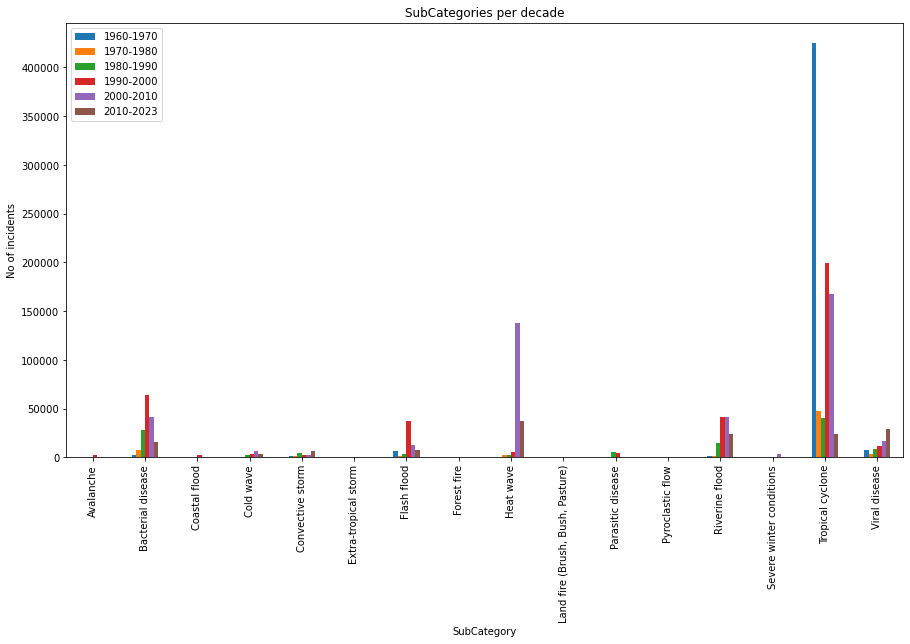

In [311]:
Categories = {'1960-1970':NND[(NND['Year'] > 1960) & (NND['Year'] <= 1970)& (NND['Disaster Subtype'] != 'Drought')].groupby('Disaster Subtype')['Total Deaths'].sum(),
              '1970-1980':NND[(NND['Year'] > 1970) & (NND['Year'] <= 1980)& (NND['Disaster Subtype'] != 'Drought')].groupby('Disaster Subtype')['Total Deaths'].sum(),
              '1980-1990':NND[(NND['Year'] > 1980) & (NND['Year'] <= 1990)& (NND['Disaster Subtype'] != 'Drought')].groupby('Disaster Subtype')['Total Deaths'].sum(),
             '1990-2000':NND[(NND['Year'] > 1990) & (NND['Year'] <= 2000)& (NND['Disaster Subtype'] != 'Drought')].groupby('Disaster Subtype')['Total Deaths'].sum(),
             '2000-2010':NND[(NND['Year'] > 2000) & (NND['Year'] <= 2010)& (NND['Disaster Subtype'] != 'Drought')].groupby('Disaster Subtype')['Total Deaths'].sum(),
             '2010-2023':NND[(NND['Year'] > 2010) & (NND['Year'] <= 2023)& (NND['Disaster Subtype'] != 'Drought')].groupby('Disaster Subtype')['Total Deaths'].sum()}
Categories_Years= pd.DataFrame(Categories)

fig, ax = plt.subplots(figsize=(15, 8))
Categories_Years.plot(kind='bar', rot=90, ax=ax)
plt.title('SubCategories per decade')
plt.xlabel('SubCategory')
plt.ylabel('No of incidents')
plt.show()

In [312]:
Disaster_Country_Deaths= Natural_Disasters.groupby(['ISO','Disaster Subtype'])['Total Deaths'].sum().reset_index()
Disaster_Country_Deaths_Before_2000= Natural_Disasters[Natural_Disasters['Year'] <=2000].groupby(['ISO','Disaster Subtype'])['Total Deaths'].sum().reset_index()
Disaster_Country_Deaths_After_2000= Natural_Disasters[Natural_Disasters['Year'] > 2000].groupby(['ISO','Disaster Subtype'])['Total Deaths'].sum().reset_index()
Disaster_Country_Deaths_Year= Natural_Disasters.groupby(['ISO','Disaster Subtype','Year'])['Total Deaths'].sum()

In [313]:
# Disaster_Country_Deaths_Before_2000

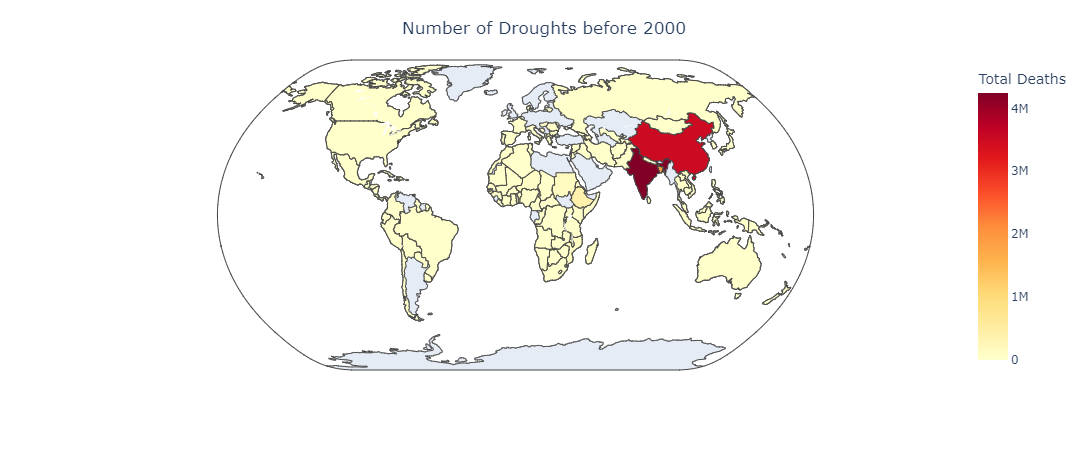

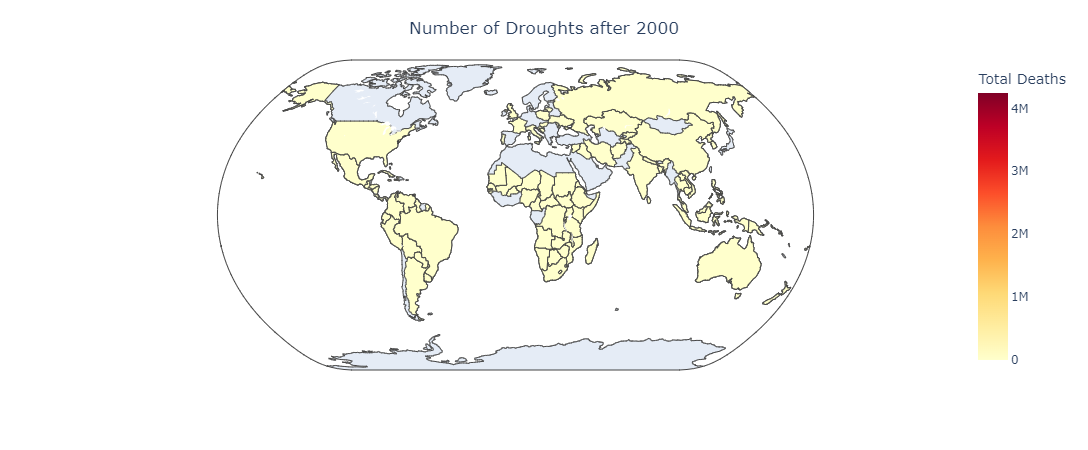

In [314]:
mapping(DF_After = Disaster_Country_Deaths_After_2000 , DF_Before = Disaster_Country_Deaths_Before_2000, subtype = 'Drought', Value = 'Total Deaths' )

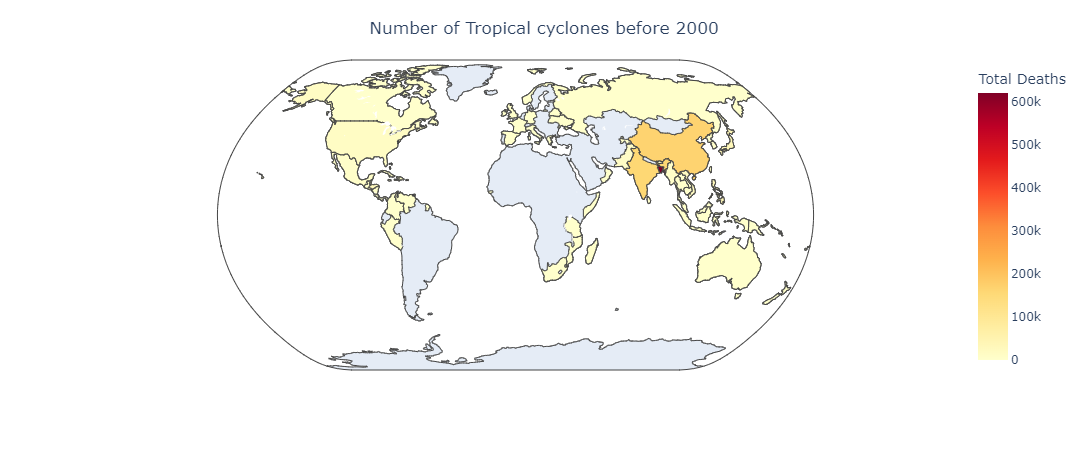

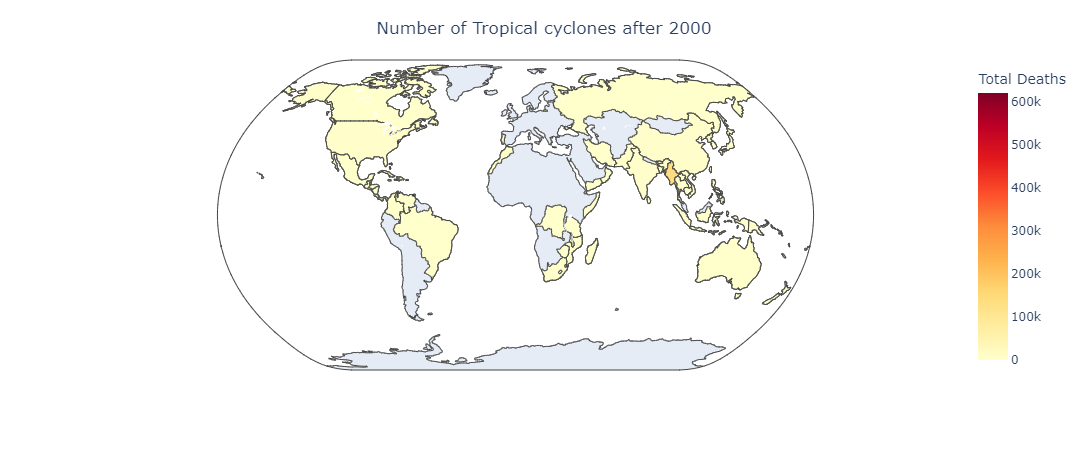

In [315]:
mapping(DF_After = Disaster_Country_Deaths_After_2000 , DF_Before = Disaster_Country_Deaths_Before_2000, subtype = 'Tropical cyclone', Value = 'Total Deaths' )

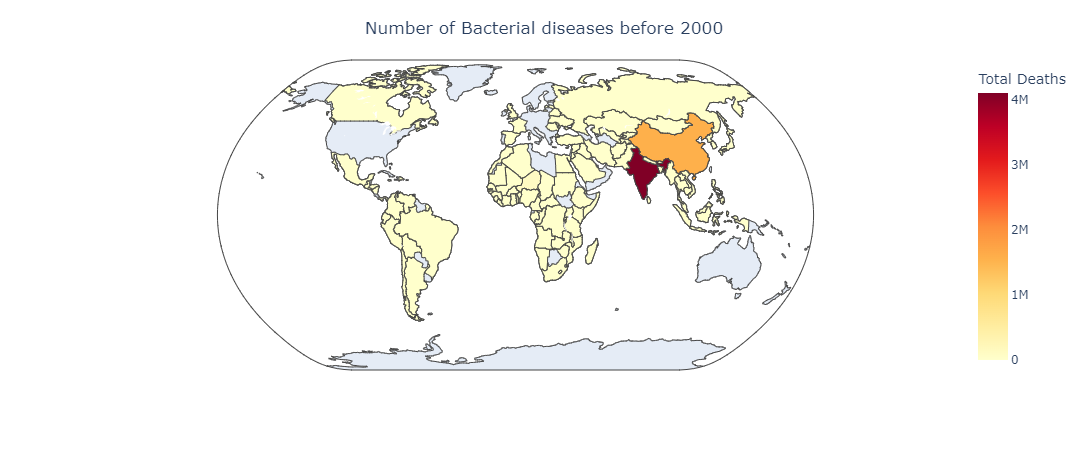

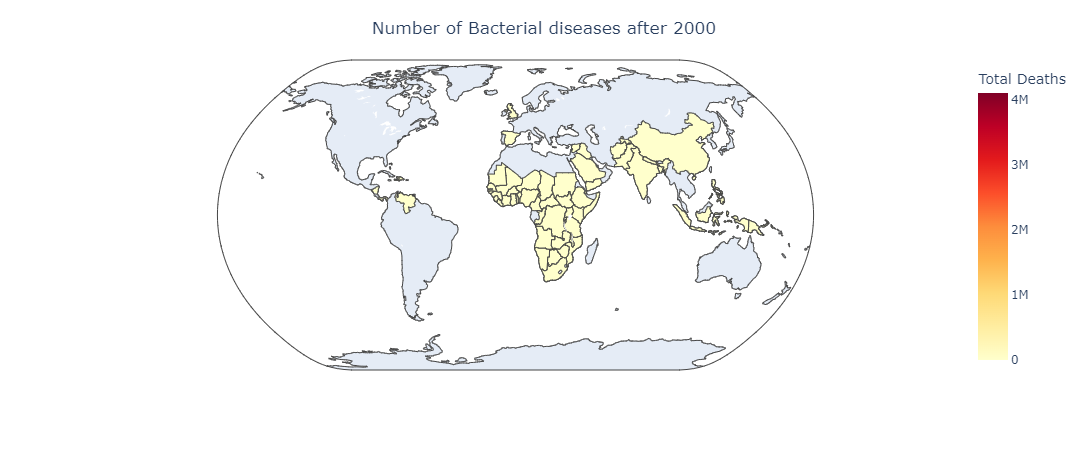

In [316]:
mapping(DF_After = Disaster_Country_Deaths_After_2000 , DF_Before = Disaster_Country_Deaths_Before_2000, subtype = 'Bacterial disease', Value = 'Total Deaths' )

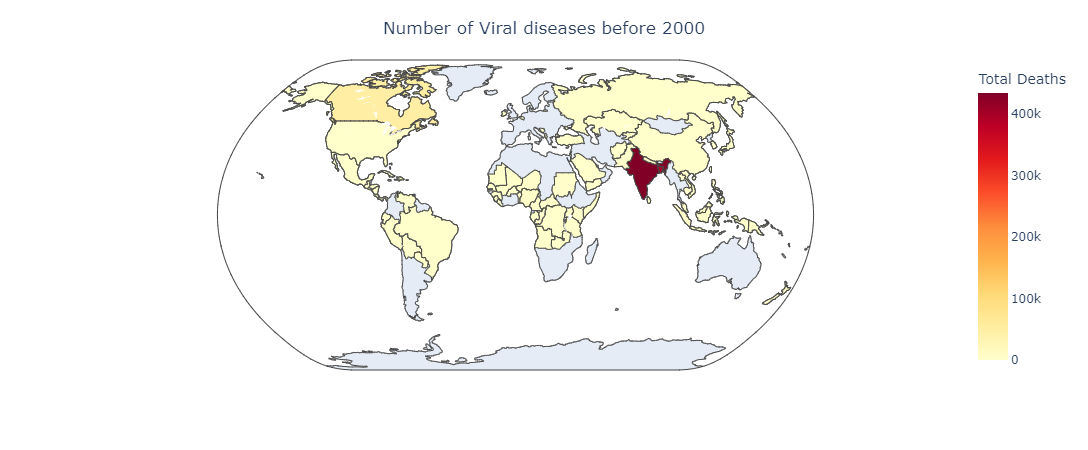

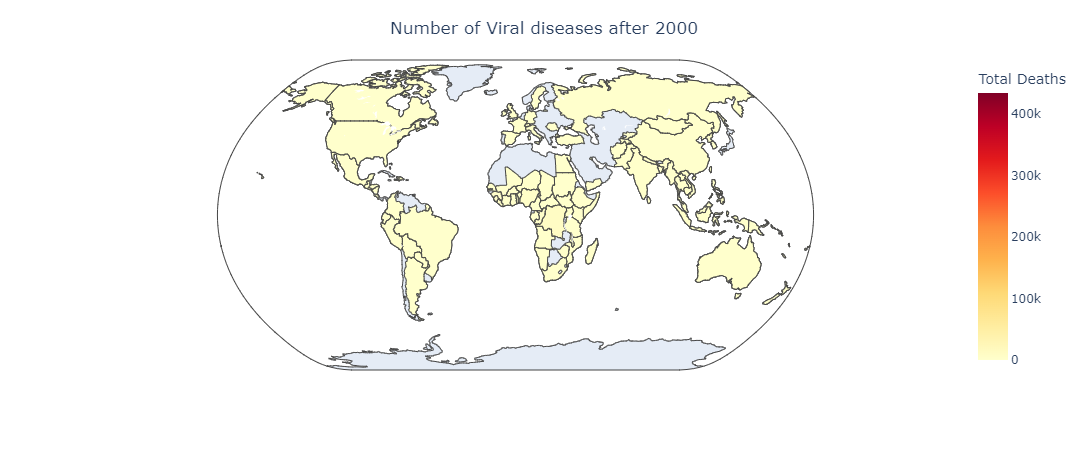

In [317]:
mapping(DF_After = Disaster_Country_Deaths_After_2000 , DF_Before = Disaster_Country_Deaths_Before_2000, subtype = 'Viral disease', Value = 'Total Deaths' )

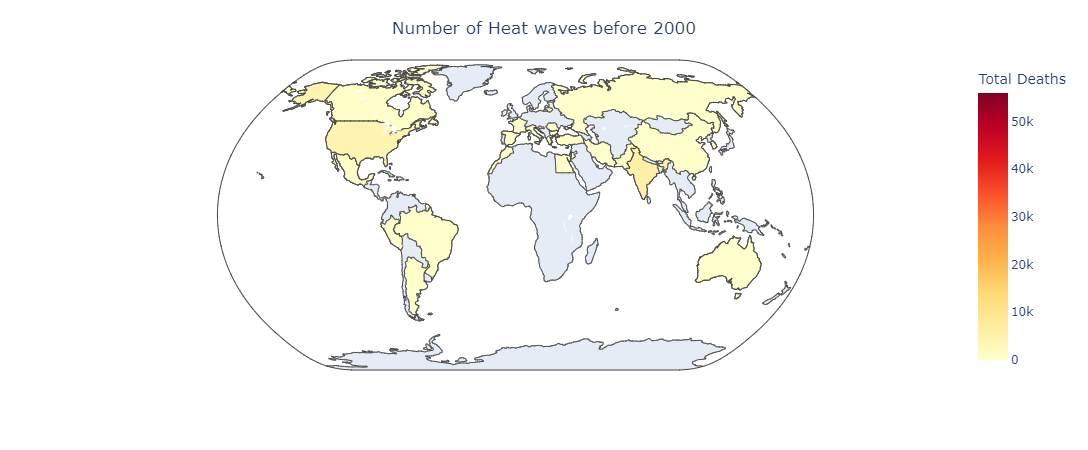

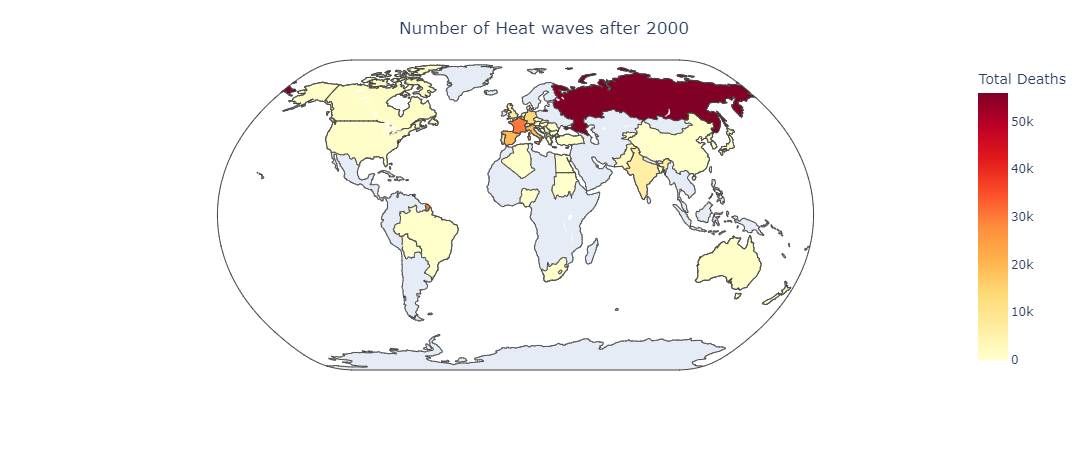

In [318]:
mapping(DF_After = Disaster_Country_Deaths_After_2000 , DF_Before = Disaster_Country_Deaths_Before_2000, subtype = 'Heat wave', Value = 'Total Deaths' )

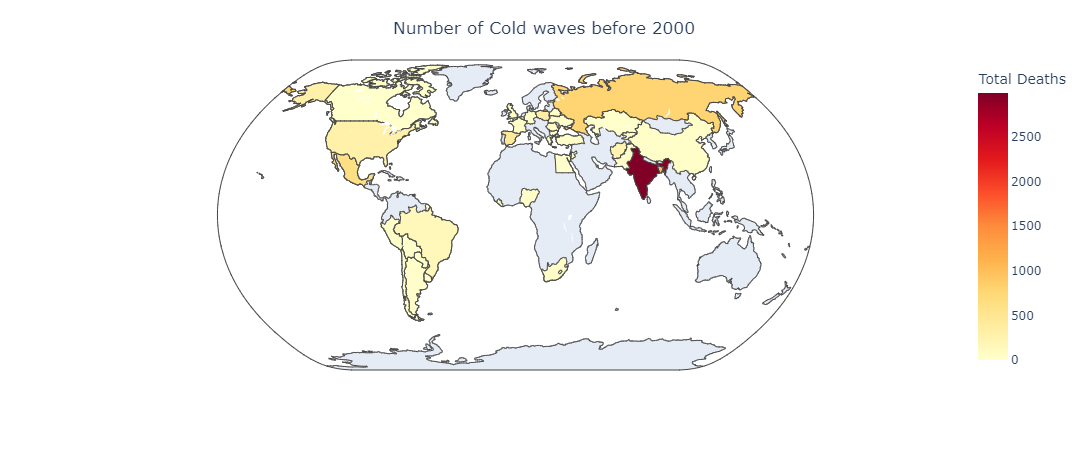

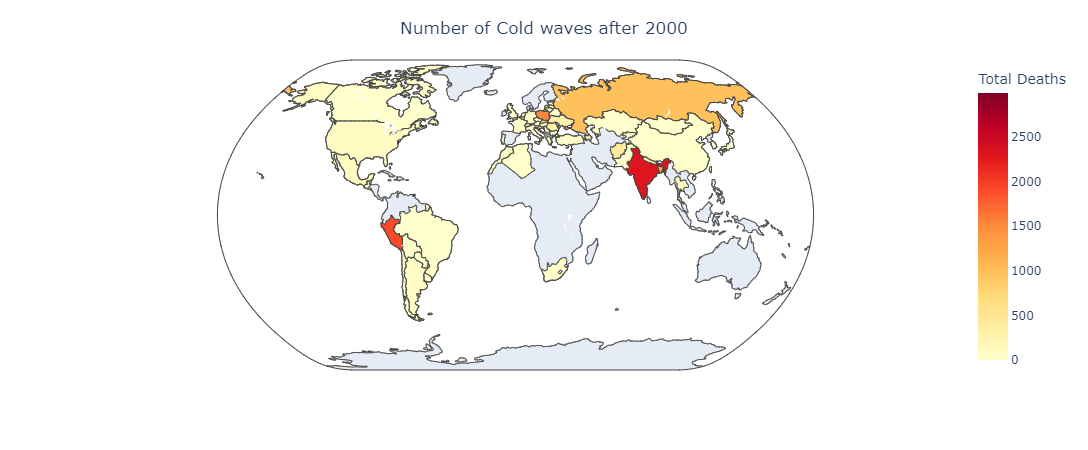

In [319]:
mapping(DF_After = Disaster_Country_Deaths_After_2000 , DF_Before = Disaster_Country_Deaths_Before_2000, subtype = 'Cold wave', Value = 'Total Deaths' )

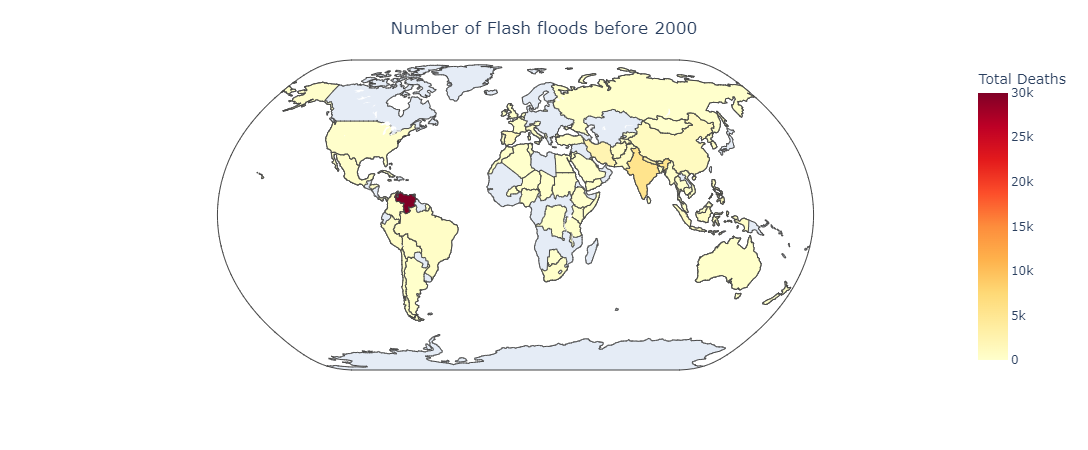

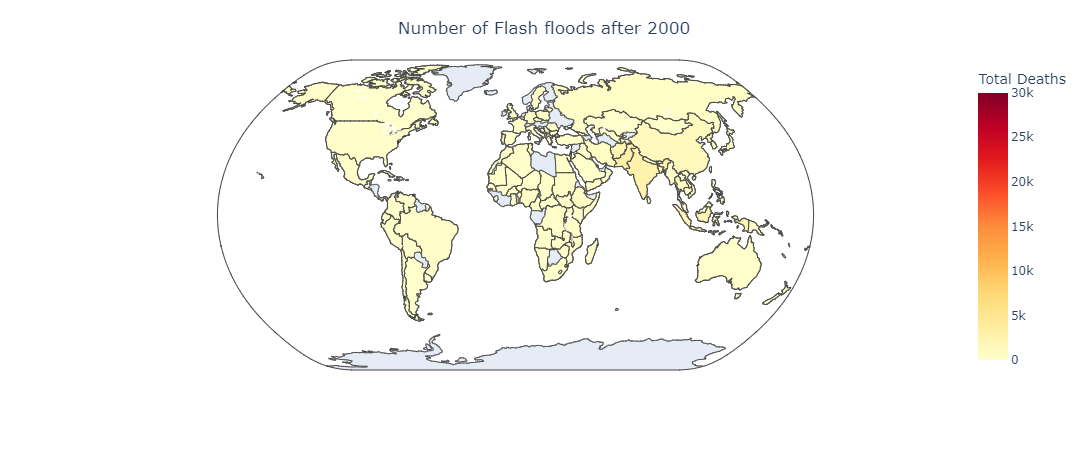

In [320]:
mapping(DF_After = Disaster_Country_Deaths_After_2000 , DF_Before = Disaster_Country_Deaths_Before_2000, subtype = 'Flash flood', Value = 'Total Deaths' )

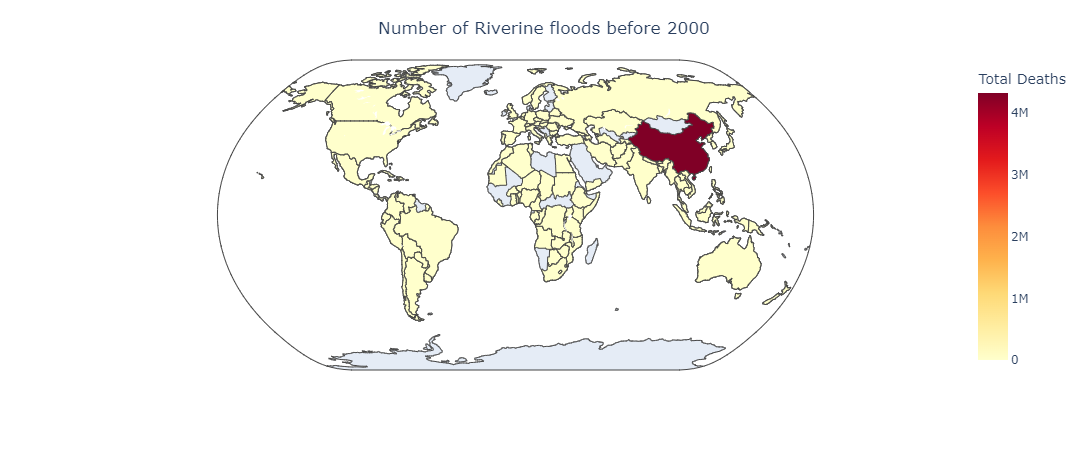

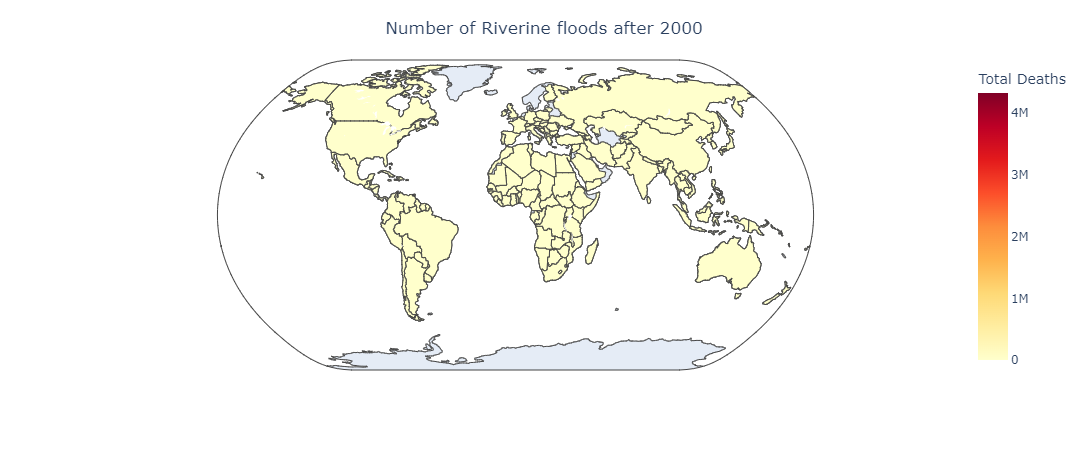

In [321]:
mapping(DF_After = Disaster_Country_Deaths_After_2000 , DF_Before = Disaster_Country_Deaths_Before_2000, subtype = 'Riverine flood', Value = 'Total Deaths' )

In [322]:
NND

Dis No                         Country  ISO            Region  \
0      1900-9002-CPV                      Cabo Verde  CPV    Western Africa   
1      1900-9001-IND                           India  IND     Southern Asia   
10     1904-0003-BGD                      Bangladesh  BGD     Southern Asia   
16     1906-0023-BEL                         Belgium  BEL    Western Europe   
17     1906-0024-BEL                         Belgium  BEL    Western Europe   
...              ...                             ...  ...               ...   
25876  2023-0032-USA  United States of America (the)  USA  Northern America   
25878  2023-0080-ZAF                    South Africa  ZAF   Southern Africa   
25879  2023-0110-ZMB                          Zambia  ZMB    Eastern Africa   
25880  2023-0068-ZMB                          Zambia  ZMB    Eastern Africa   
25881  2023-0022-SRB                          Serbia  SRB   Southern Europe   

       Year                         Country  \
0      1900                      Cabo Verde   
1      1900                           India   
10     1904                      Bangladesh   
16     1906                         Belgium   
17     1906                         Belgium   
...     ...                             ...   
25876  2023  United States of America (the)   
25878  2023                    South Africa   
25879  2023                          Zambia   
25880  2023                          Zambia   
25881  2023                          Serbia   

                                                Location  \
0                                            Countrywide   
1                                                 Bengal   
10                                            Chittagong   
16                                        Louvain region   
17                                                   NaN   
...                                                  ...   
25876                                Alabama and Georgia   
25878  Mpumalanga, the Eastern Cape, Gauteng, KwaZulu...   
25879              Namwala, Monze and Mazabuka districts   
25880  Chikoma, Mbande, Mzigawa, Chipanji, Mlawe, Eas...   
25881  Sjenica and Brodarevo Novi Pazar Municipality;...   

                                  Origin Associated Dis Associated Dis2  \
0                                    NaN         Famine             NaN   
1                                    NaN            NaN             NaN   
10                                   NaN            NaN             NaN   
16                                   NaN            NaN             NaN   
17                                   NaN            NaN             NaN   
...                                  ...            ...             ...   
25876                                NaN            NaN             NaN   
25878                        Heavy rains            NaN             NaN   
25879                        Heavy rains            NaN             NaN   
25880                                NaN            NaN             NaN   
25881  Heavy rainfall and river overflow            NaN             NaN   

        Disaster Subtype Disaster Subsubtype  Start Year  Total Deaths  \
0                Drought                 NaN        1900       11000.0   
1                Drought                 NaN        1900     1250000.0   
10      Tropical cyclone                 NaN        1904           NaN   
16                   NaN                 NaN        1906           6.0   
17                   NaN                 NaN        1906           NaN   
...                  ...                 ...         ...           ...   
25876   Convective storm             Tornado        2023          11.0   
25878                NaN                 NaN        2023          17.0   
25879        Flash flood                 NaN        2023           NaN   
25880  Bacterial disease                 NaN        2023           2.0   
25881     Riverine flood                 NaN        2023        

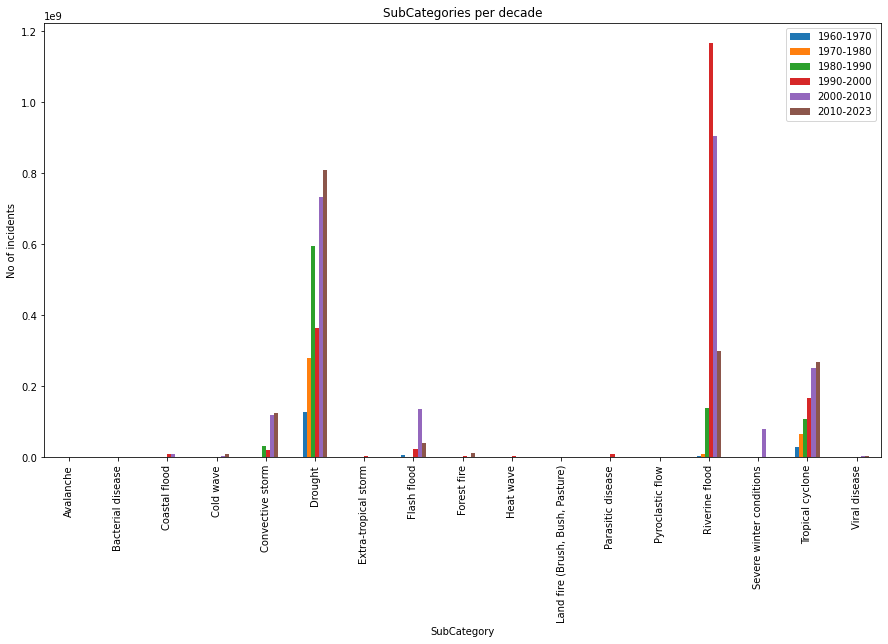

In [323]:
Categories = {'1960-1970':NND[(NND['Year'] > 1960) & (NND['Year'] <= 1970)].groupby('Disaster Subtype')['Total Affected'].sum(),
              '1970-1980':NND[(NND['Year'] > 1970) & (NND['Year'] <= 1980)].groupby('Disaster Subtype')['Total Affected'].sum(),
              '1980-1990':NND[(NND['Year'] > 1980) & (NND['Year'] <= 1990)].groupby('Disaster Subtype')['Total Affected'].sum(),
             '1990-2000':NND[(NND['Year'] > 1990) & (NND['Year'] <= 2000)].groupby('Disaster Subtype')['Total Affected'].sum(),
             '2000-2010':NND[(NND['Year'] > 2000) & (NND['Year'] <= 2010)].groupby('Disaster Subtype')['Total Affected'].sum(),
             '2010-2023':NND[(NND['Year'] > 2010) & (NND['Year'] <= 2023)].groupby('Disaster Subtype')['Total Affected'].sum()}
Categories_Years= pd.DataFrame(Categories)

fig, ax = plt.subplots(figsize=(15, 8))
Categories_Years.plot(kind='bar', rot=90, ax=ax)
plt.title('SubCategories per decade')
plt.xlabel('SubCategory')
plt.ylabel('No of incidents')
plt.show()


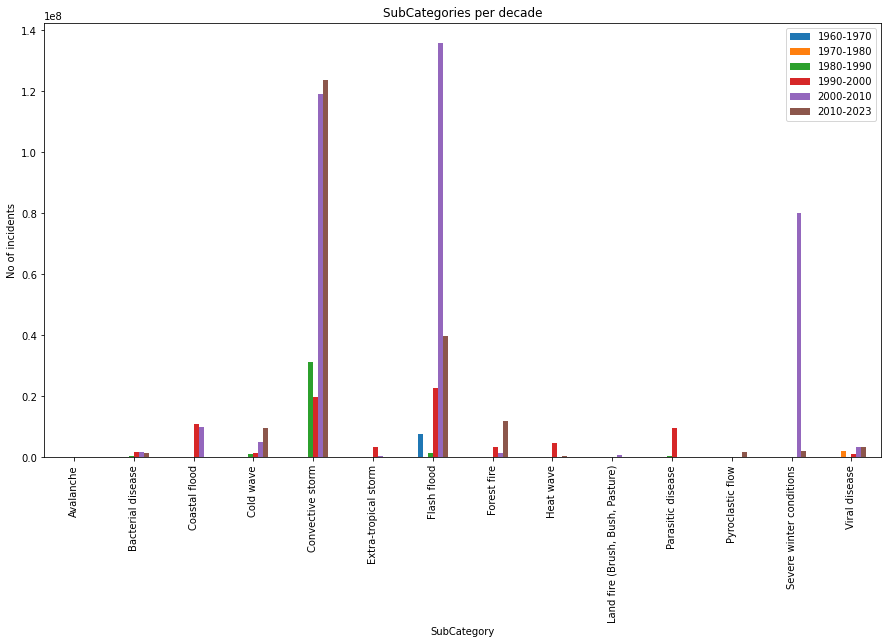

In [324]:
Categories = {'1960-1970':NND[(NND['Year'] > 1960) & (NND['Year'] <= 1970)& (NND['Disaster Subtype'] != 'Drought')& (NND['Disaster Subtype'] != 'Riverine flood')& (NND['Disaster Subtype'] != 'Tropical cyclone')].groupby('Disaster Subtype')['Total Affected'].sum(),
              '1970-1980':NND[(NND['Year'] > 1970) & (NND['Year'] <= 1980)& (NND['Disaster Subtype'] != 'Drought')& (NND['Disaster Subtype'] != 'Riverine flood')& (NND['Disaster Subtype'] != 'Tropical cyclone')].groupby('Disaster Subtype')['Total Affected'].sum(),
              '1980-1990':NND[(NND['Year'] > 1980) & (NND['Year'] <= 1990)& (NND['Disaster Subtype'] != 'Drought')& (NND['Disaster Subtype'] != 'Riverine flood')& (NND['Disaster Subtype'] != 'Tropical cyclone')].groupby('Disaster Subtype')['Total Affected'].sum(),
             '1990-2000':NND[(NND['Year'] > 1990) & (NND['Year'] <= 2000)& (NND['Disaster Subtype'] != 'Drought')& (NND['Disaster Subtype'] != 'Riverine flood')& (NND['Disaster Subtype'] != 'Tropical cyclone')].groupby('Disaster Subtype')['Total Affected'].sum(),
             '2000-2010':NND[(NND['Year'] > 2000) & (NND['Year'] <= 2010)& (NND['Disaster Subtype'] != 'Drought')& (NND['Disaster Subtype'] != 'Riverine flood')& (NND['Disaster Subtype'] != 'Tropical cyclone')].groupby('Disaster Subtype')['Total Affected'].sum(),
             '2010-2023':NND[(NND['Year'] > 2010) & (NND['Year'] <= 2023)& (NND['Disaster Subtype'] != 'Drought')& (NND['Disaster Subtype'] != 'Riverine flood')& (NND['Disaster Subtype'] != 'Tropical cyclone')].groupby('Disaster Subtype')['Total Affected'].sum()}
Categories_Years= pd.DataFrame(Categories)

fig, ax = plt.subplots(figsize=(15, 8))
Categories_Years.plot(kind='bar', rot=90, ax=ax)
plt.title('SubCategories per decade')
plt.xlabel('SubCategory')
plt.ylabel('No of incidents')
plt.show()

In [325]:
Disaster_Country_Affected= Natural_Disasters.groupby(['ISO','Disaster Subtype'])['Total Affected'].sum().reset_index()
Disaster_Country_Affected_Before_2000= Natural_Disasters[Natural_Disasters['Year'] <=2000].groupby(['ISO','Disaster Subtype'])['Total Affected'].sum().reset_index()
Disaster_Country_Affected_After_2000= Natural_Disasters[Natural_Disasters['Year'] > 2000].groupby(['ISO','Disaster Subtype'])['Total Affected'].sum().reset_index()
Disaster_Country_Affected_Year= Natural_Disasters.groupby(['ISO','Disaster Subtype','Year'])['Total Affected'].sum()

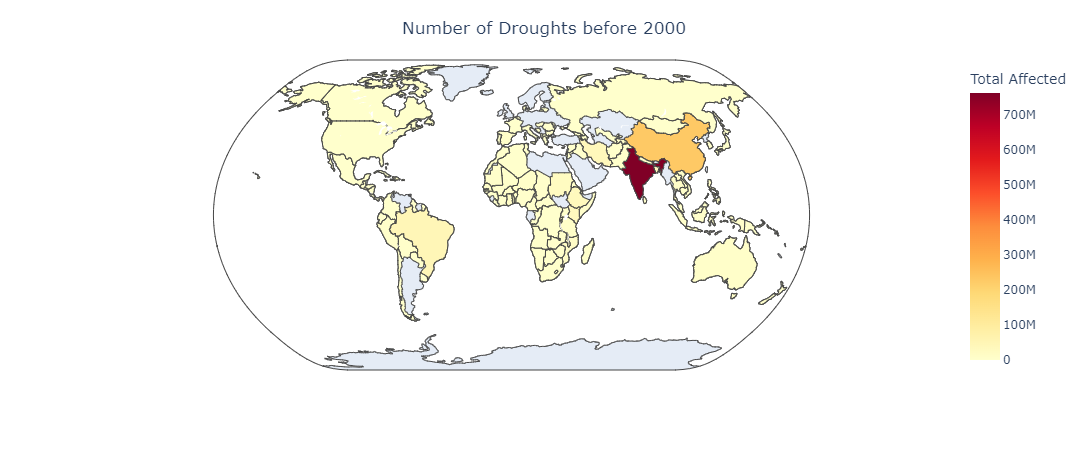

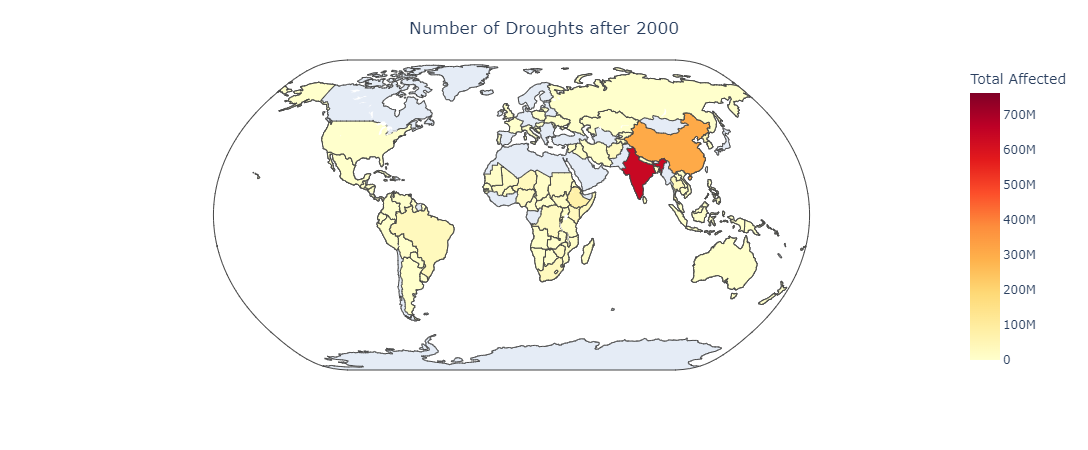

In [326]:
mapping(DF_After = Disaster_Country_Affected_After_2000 , DF_Before = Disaster_Country_Affected_Before_2000, subtype = 'Drought', Value = 'Total Affected' )

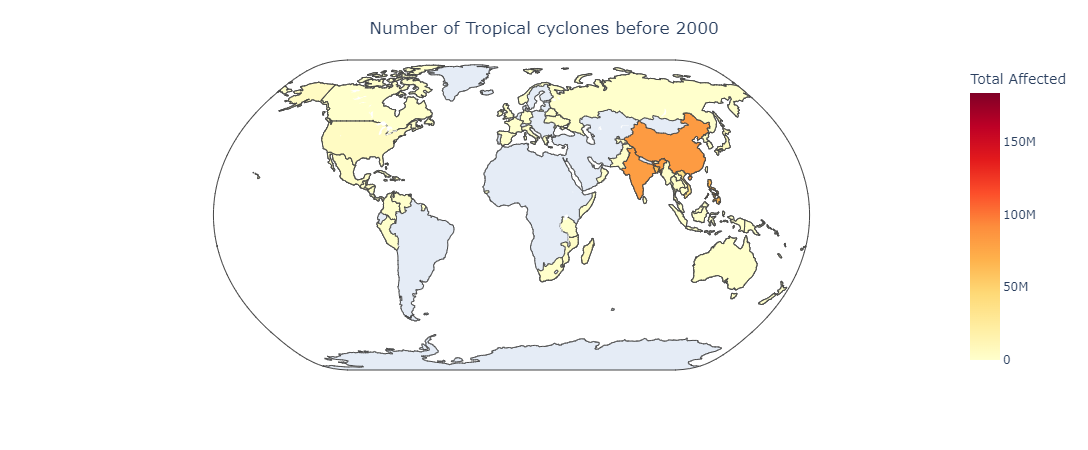

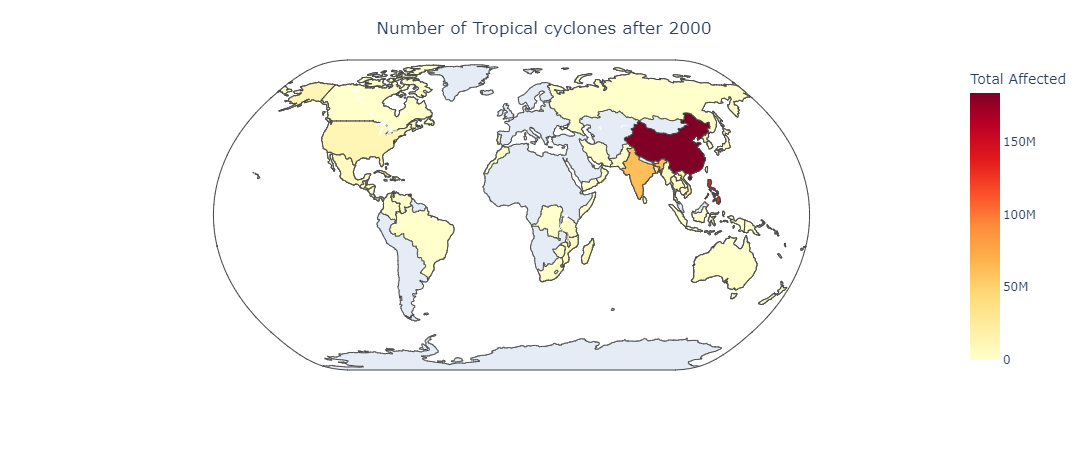

In [327]:
mapping(DF_After = Disaster_Country_Affected_After_2000 , DF_Before = Disaster_Country_Affected_Before_2000, subtype = 'Tropical cyclone', Value = 'Total Affected' )

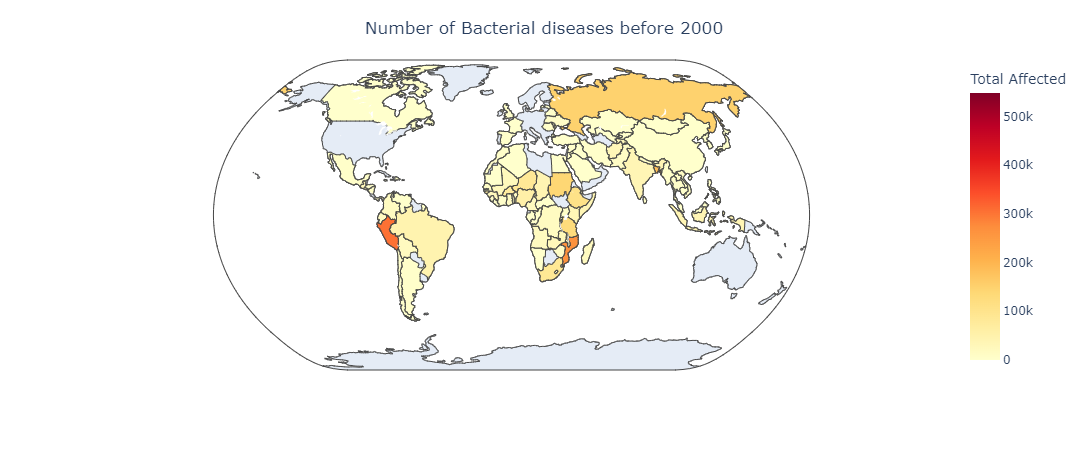

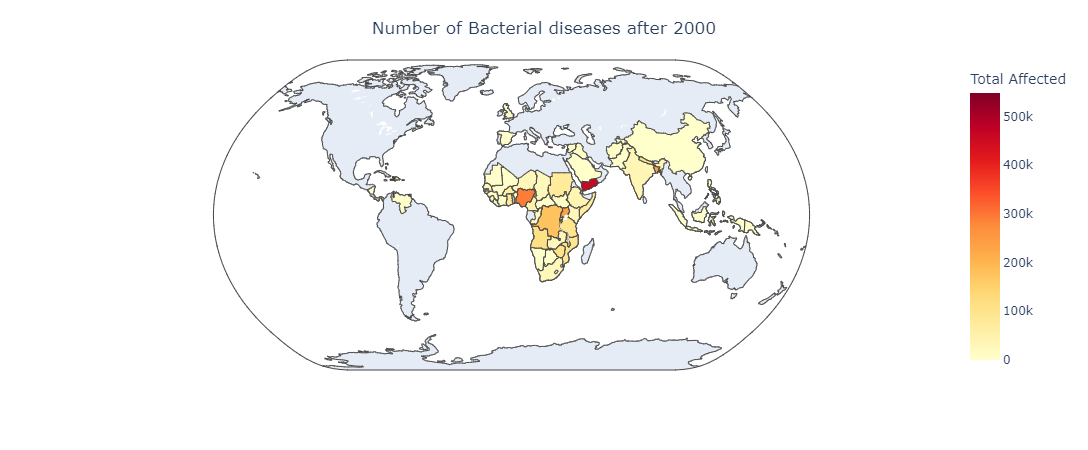

In [328]:
mapping(DF_After = Disaster_Country_Affected_After_2000 , DF_Before = Disaster_Country_Affected_Before_2000, subtype = 'Bacterial disease', Value = 'Total Affected' )

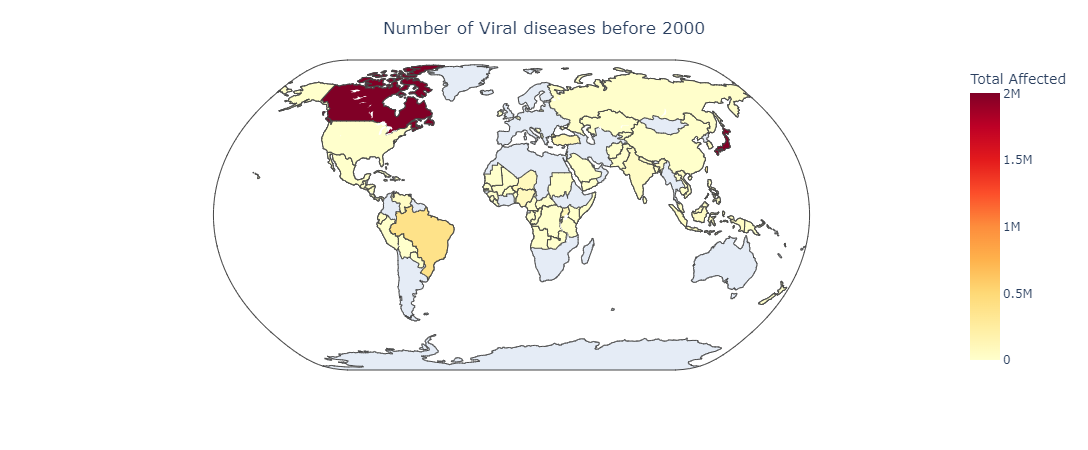

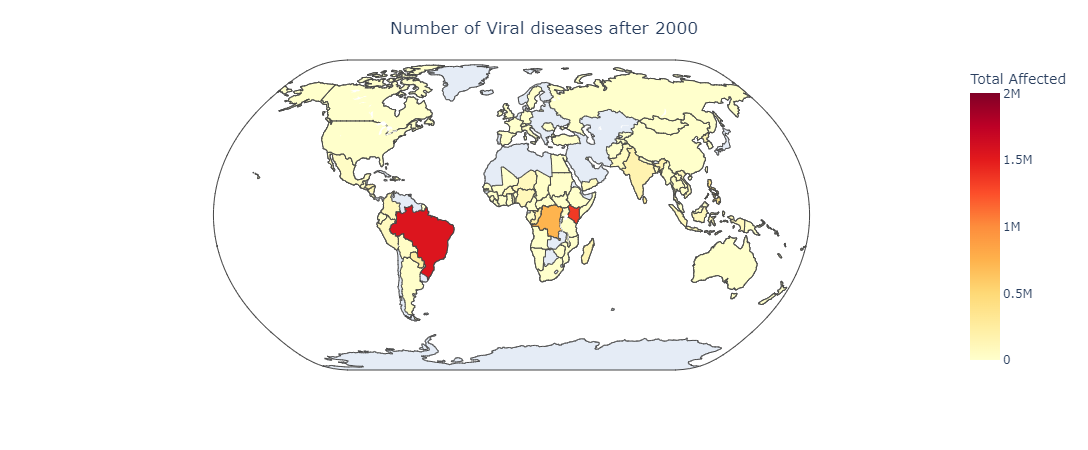

In [329]:
mapping(DF_After = Disaster_Country_Affected_After_2000 , DF_Before = Disaster_Country_Affected_Before_2000, subtype = 'Viral disease', Value = 'Total Affected' )

'Drought' 'Tropical cyclone' nan 'Bacterial disease' 'Avalanche'
 'Forest fire' 'Riverine flood' 'Convective storm' 'Viral disease'
 'Heat wave' 'Land fire (Brush, Bush, Pasture)' 'Coastal flood'
 'Cold wave' 'Flash flood' 'Parasitic disease' 'Severe winter conditions'
 'Extra-tropical storm' 'Pyroclastic flow'

## Total Damage in thousands of dollars

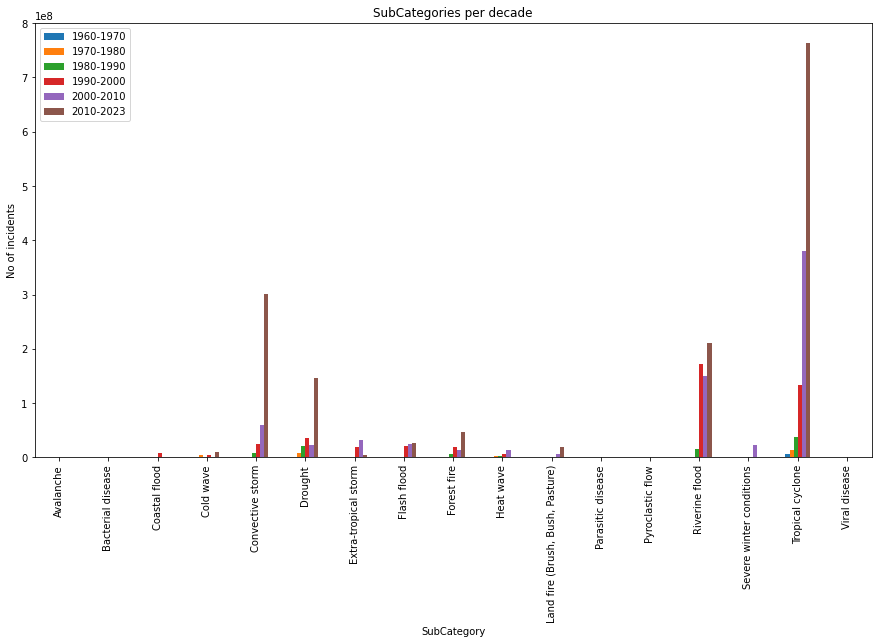

In [330]:
Categories = {'1960-1970':NND[(NND['Year'] > 1960) & (NND['Year'] <= 1970)].groupby('Disaster Subtype')["Total Damages ('000 US$)"].sum(),
              '1970-1980':NND[(NND['Year'] > 1970) & (NND['Year'] <= 1980)].groupby('Disaster Subtype')["Total Damages ('000 US$)"].sum(),
              '1980-1990':NND[(NND['Year'] > 1980) & (NND['Year'] <= 1990)].groupby('Disaster Subtype')["Total Damages ('000 US$)"].sum(),
             '1990-2000':NND[(NND['Year'] > 1990) & (NND['Year'] <= 2000)].groupby('Disaster Subtype')["Total Damages ('000 US$)"].sum(),
             '2000-2010':NND[(NND['Year'] > 2000) & (NND['Year'] <= 2010)].groupby('Disaster Subtype')["Total Damages ('000 US$)"].sum(),
             '2010-2023':NND[(NND['Year'] > 2010) & (NND['Year'] <= 2023)].groupby('Disaster Subtype')["Total Damages ('000 US$)"].sum()}
Categories_Years= pd.DataFrame(Categories)

fig, ax = plt.subplots(figsize=(15, 8))
Categories_Years.plot(kind='bar', rot=90, ax=ax)
plt.title('SubCategories per decade')
plt.xlabel('SubCategory')
plt.ylabel('No of incidents')
plt.show()


In [331]:
Disaster_Country_Damage= Natural_Disasters.groupby(['ISO','Disaster Subtype'])["Total Damages ('000 US$)"].sum().reset_index()
Disaster_Country_Damage_Before_2000= Natural_Disasters[Natural_Disasters['Year'] <=2000].groupby(['ISO','Disaster Subtype'])["Total Damages ('000 US$)"].sum().reset_index()
Disaster_Country_Damage_After_2000= Natural_Disasters[Natural_Disasters['Year'] > 2000].groupby(['ISO','Disaster Subtype'])["Total Damages ('000 US$)"].sum().reset_index()
Disaster_Country_Damage_Year= Natural_Disasters.groupby(['ISO','Disaster Subtype','Year'])["Total Damages ('000 US$)"].sum()

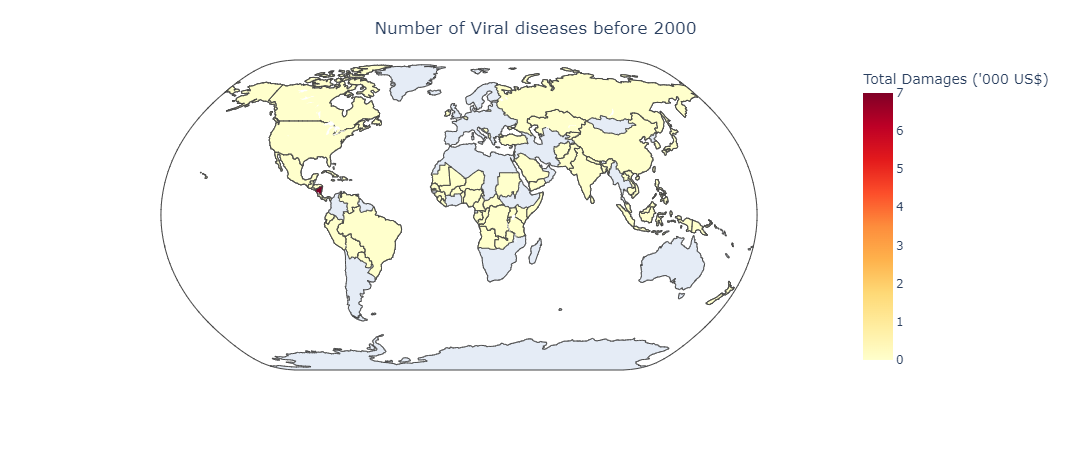

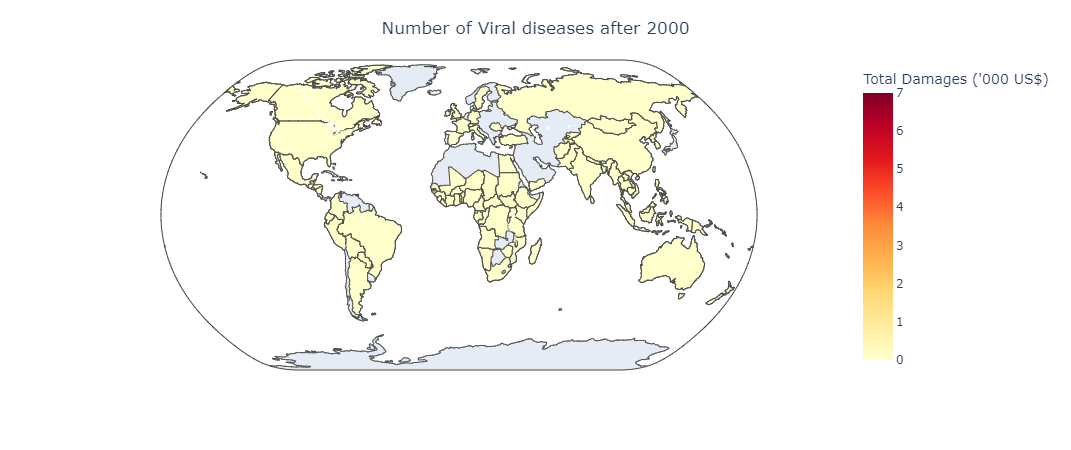

In [332]:
mapping(DF_After = Disaster_Country_Damage_After_2000 , DF_Before = Disaster_Country_Damage_Before_2000, subtype = 'Viral disease', Value = "Total Damages ('000 US$)" )

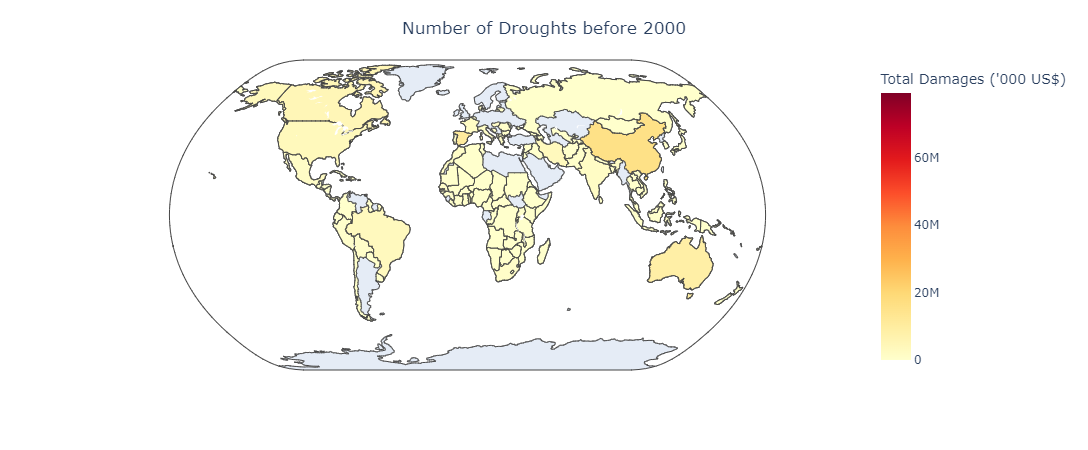

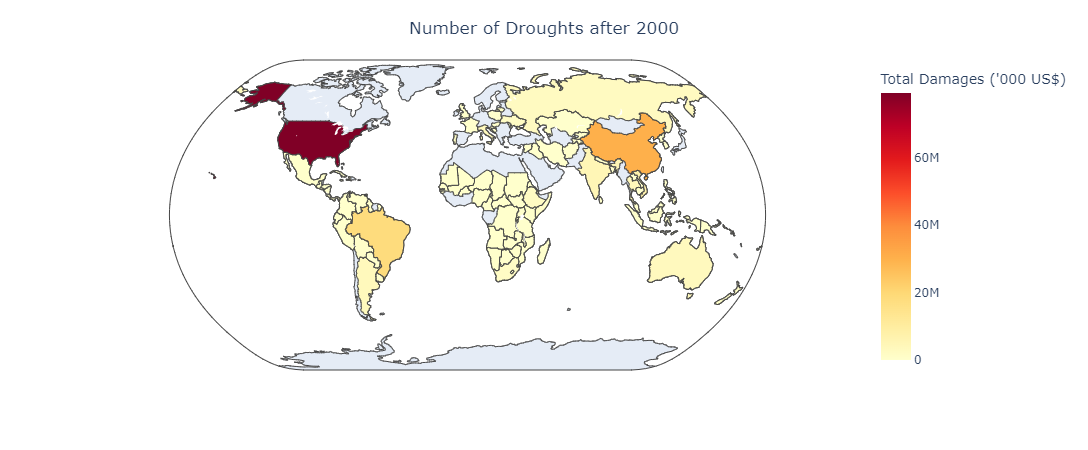

In [333]:
mapping(DF_After = Disaster_Country_Damage_After_2000 , DF_Before = Disaster_Country_Damage_Before_2000, subtype = 'Drought', Value = "Total Damages ('000 US$)" )

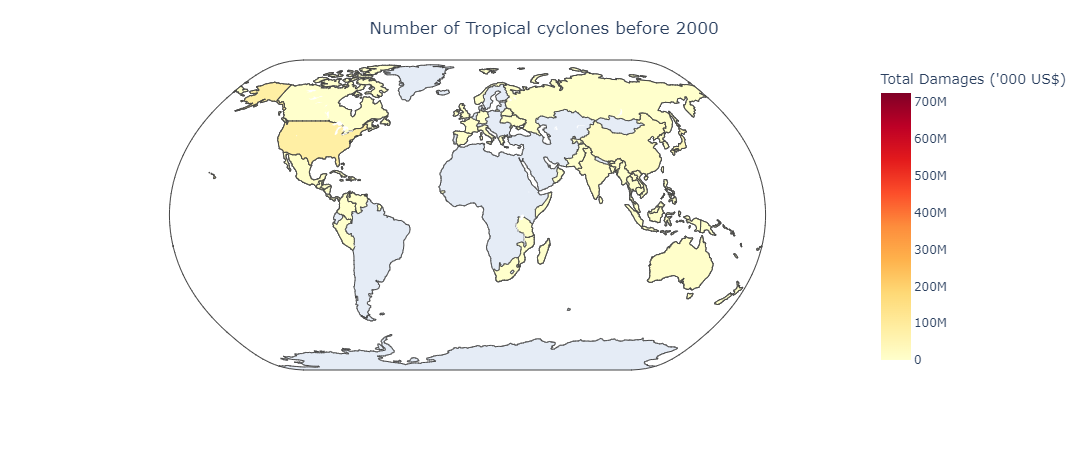

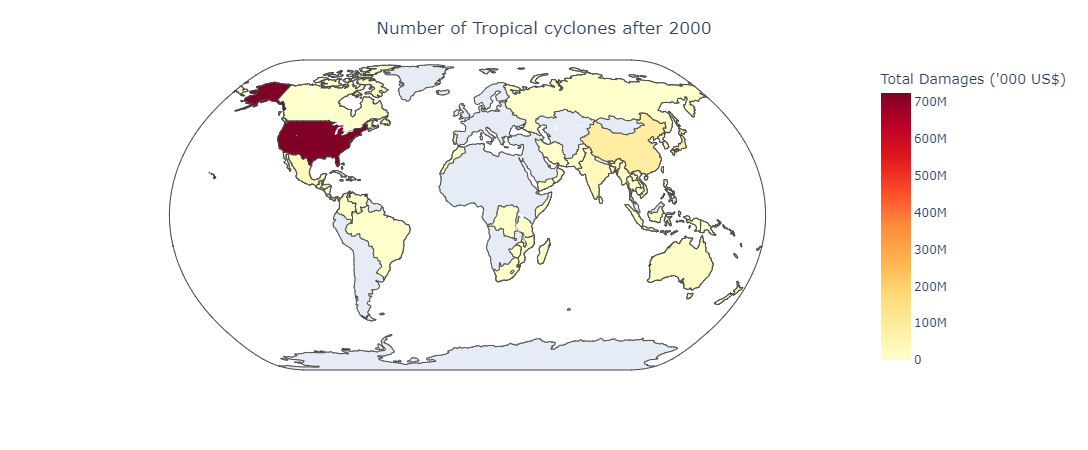

In [334]:
mapping(DF_After = Disaster_Country_Damage_After_2000 , DF_Before = Disaster_Country_Damage_Before_2000, subtype = 'Tropical cyclone', Value = "Total Damages ('000 US$)" )

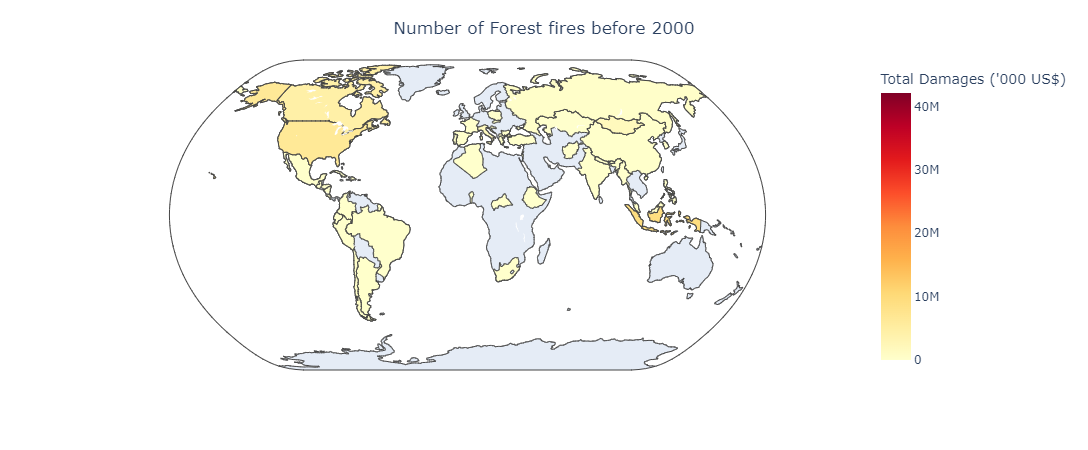

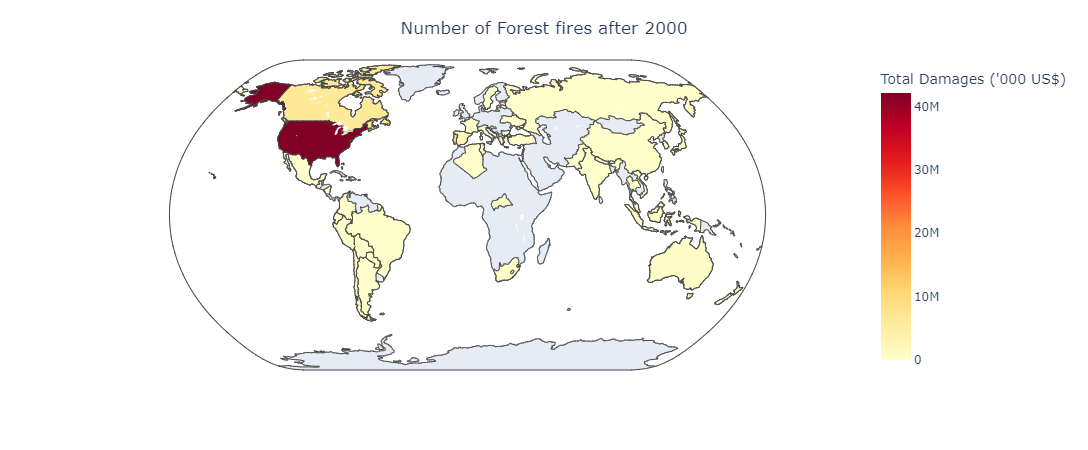

In [335]:
mapping(DF_After = Disaster_Country_Damage_After_2000 , DF_Before = Disaster_Country_Damage_Before_2000, subtype = 'Forest fire', Value = "Total Damages ('000 US$)" )

'Drought' 'Tropical cyclone' nan 'Bacterial disease' 'Avalanche'
 'Forest fire' 'Riverine flood' 'Convective storm' 'Viral disease'
 'Heat wave' 'Land fire (Brush, Bush, Pasture)' 'Coastal flood'
 'Cold wave' 'Flash flood' 'Parasitic disease' 'Severe winter conditions'
 'Extra-tropical storm' 'Pyroclastic flow'